##Airfare rate- Price Predictor

In [112]:
import pandas as pd
from pandas import Series
from datetime import datetime



In [113]:
airFare = pd.read_csv("Data_Train.csv")

In [114]:
airFare.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [115]:
airFare.info()











<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [116]:
airFare['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [117]:
airFare.describe()
df = pd.DataFrame(airFare)
df['TravellingDaysLeft'] = pd.to_datetime(df['Date_of_Journey'])
current_date = pd.to_datetime('2018-12-03')

airFare["TravellingDaysLeft"] = (df['TravellingDaysLeft'] - current_date).dt.days
print(airFare["TravellingDaysLeft"])

timedelta = pd.to_timedelta(df['Duration'])

time_series = pd.Series(df['Duration'])

airFare['totalDurationTime']= pd.to_timedelta(time_series).dt.total_seconds() / 60
print(airFare['totalDurationTime'])

airFare['Totalstopage'] = df['Total_Stops'].replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4})
print(airFare['Totalstopage'] )







C:\Users\HP\AppData\Local\Temp\ipykernel_5628\1209449241.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['TravellingDaysLeft'] = pd.to_datetime(df['Date_of_Journey'])


0        111
1        149
2        188
3        160
4         88
        ... 
10678    127
10679    145
10680    145
10681     88
10682    157
Name: TravellingDaysLeft, Length: 10683, dtype: int64
0         170.0
1         445.0
2        1140.0
3         325.0
4         285.0
          ...  
10678     150.0
10679     155.0
10680     180.0
10681     160.0
10682     500.0
Name: totalDurationTime, Length: 10683, dtype: float64
0        0.0
1        2.0
2        2.0
3        1.0
4        1.0
        ... 
10678    0.0
10679    0.0
10680    0.0
10681    0.0
10682    2.0
Name: Totalstopage, Length: 10683, dtype: float64


In [118]:
%matplotlib inline

array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'TravellingDaysLeft'}>],
       [<Axes: title={'center': 'totalDurationTime'}>,
        <Axes: title={'center': 'Totalstopage'}>]], dtype=object)

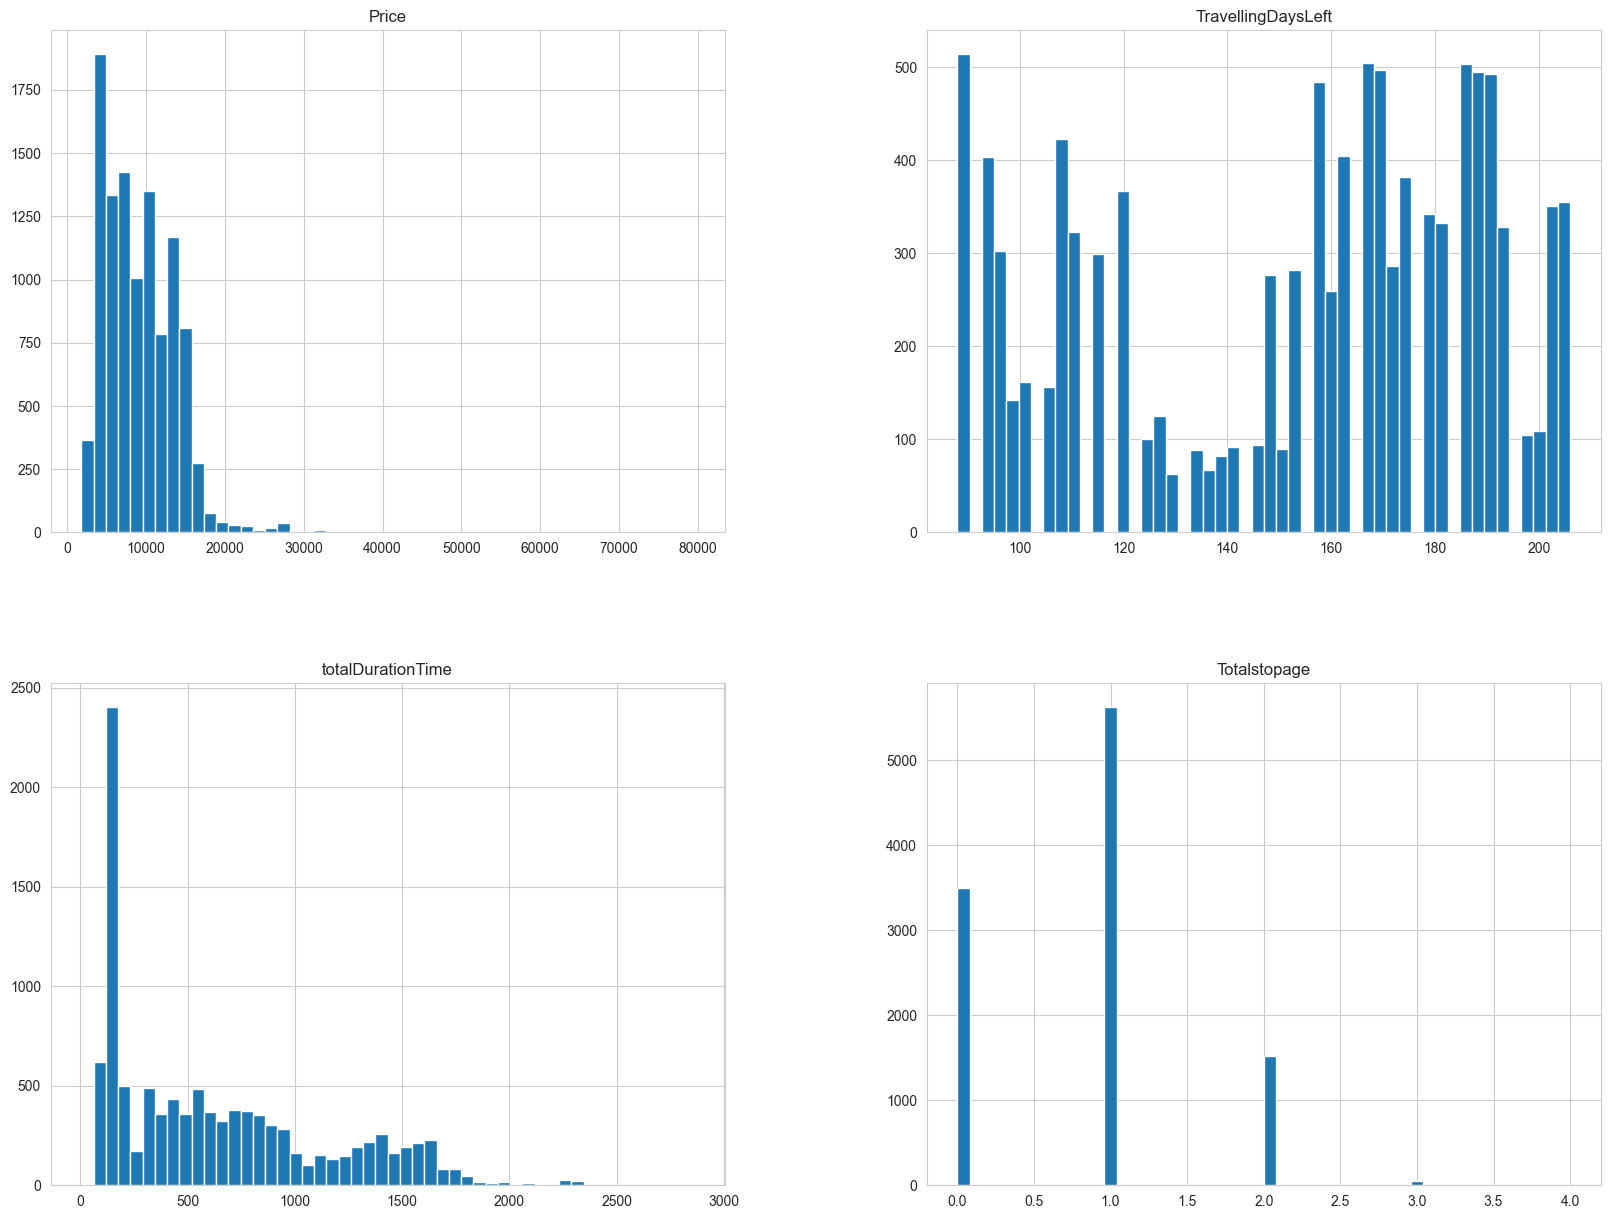

In [119]:
## For plotting histogram
import matplotlib.pyplot as plt
airFare.hist(bins=50, figsize=(20, 15))

## Train-Test Splitting

In [120]:

df = pd.DataFrame(airFare)
airFare=airFare.drop('Airline', axis=1)
airFare=airFare.drop('Date_of_Journey', axis=1)
airFare=airFare.drop('Source', axis=1)
airFare=airFare.drop('Destination', axis=1)
airFare=airFare.drop('Route', axis=1)
airFare=airFare.drop('Dep_Time', axis=1)
airFare=airFare.drop('Arrival_Time', axis=1)
airFare=airFare.drop('Duration', axis=1)
airFare=airFare.drop('Additional_Info', axis=1)
airFare=airFare.drop('Total_Stops', axis=1)
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:] 
    return data.iloc[train_indices], data.iloc[test_indices]

In [121]:
# train_set, test_set = split_train_test(housing, 0.2)

In [122]:
# print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

In [123]:
from sklearn.model_selection import train_test_split
train_set, test_set  = train_test_split(airFare, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 8546
Rows in test set: 2137



In [124]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=3)
for train_index,test_index in kf.split(airFare):
    print(len(train_index),"  ",len(test_index))


7122    3561
7122    3561
7122    3561


In [125]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(airFare, airFare['TravellingDaysLeft']):
    strat_train_set = airFare.loc[train_index]
    strat_test_set = airFare.loc[test_index]
    
print(type(strat_test_set))

<class 'pandas.core.frame.DataFrame'>


In [126]:
strat_test_set['TravellingDaysLeft'].value_counts()

TravellingDaysLeft
166    101
185    101
169    100
191     99
188     99
157     97
108     85
163     81
93      81
175     76
206     71
203     70
180     68
182     67
194     66
111     65
90      63
96      60
114     60
172     57
154     56
149     55
160     52
119     51
88      40
102     32
105     31
99      28
127     25
121     22
200     22
197     21
124     20
145     19
133     18
142     18
151     18
139     16
130     13
136     13
Name: count, dtype: int64

In [127]:
strat_train_set['TravellingDaysLeft'].value_counts()

TravellingDaysLeft
166    403
185    402
169    397
188    396
191    394
157    387
108    338
163    324
93     322
175    306
206    284
203    281
180    274
182    266
194    262
111    258
90     252
96     242
114    239
172    229
154    226
149    222
160    207
119    206
88     159
102    130
105    125
99     114
127    100
121     88
200     87
197     84
124     80
145     75
142     74
151     72
133     71
139     66
136     54
130     50
Name: count, dtype: int64

In [128]:
airFare.head()

,Price,TravellingDaysLeft,totalDurationTime,Totalstopage
0,3897,111,170.0,0.0
1,7662,149,445.0,2.0
2,13882,188,1140.0,2.0
3,6218,160,325.0,1.0
4,13302,88,285.0,1.0


## Looking for Correlations

In [129]:
corr_matrix = airFare.corr()
print(corr_matrix)
corr_matrix['Price'].sort_values(ascending=False)

                       Price  TravellingDaysLeft  totalDurationTime  \
Price               1.000000           -0.138452           0.506371   
TravellingDaysLeft -0.138452            1.000000           0.008620   
totalDurationTime   0.506371            0.008620           1.000000   
Totalstopage        0.603897            0.050490           0.738071   

                    Totalstopage  
Price                   0.603897  
TravellingDaysLeft      0.050490  
totalDurationTime       0.738071  
Totalstopage            1.000000  


Price                 1.000000
Totalstopage          0.603897
totalDurationTime     0.506371
TravellingDaysLeft   -0.138452
Name: Price, dtype: float64

array([[<Axes: xlabel='Price', ylabel='Price'>,
        <Axes: xlabel='Totalstopage', ylabel='Price'>,
        <Axes: xlabel='totalDurationTime', ylabel='Price'>,
        <Axes: xlabel='TravellingDaysLeft', ylabel='Price'>],
       [<Axes: xlabel='Price', ylabel='Totalstopage'>,
        <Axes: xlabel='Totalstopage', ylabel='Totalstopage'>,
        <Axes: xlabel='totalDurationTime', ylabel='Totalstopage'>,
        <Axes: xlabel='TravellingDaysLeft', ylabel='Totalstopage'>],
       [<Axes: xlabel='Price', ylabel='totalDurationTime'>,
        <Axes: xlabel='Totalstopage', ylabel='totalDurationTime'>,
        <Axes: xlabel='totalDurationTime', ylabel='totalDurationTime'>,
        <Axes: xlabel='TravellingDaysLeft', ylabel='totalDurationTime'>],
       [<Axes: xlabel='Price', ylabel='TravellingDaysLeft'>,
        <Axes: xlabel='Totalstopage', ylabel='TravellingDaysLeft'>,
        <Axes: xlabel='totalDurationTime', ylabel='TravellingDaysLeft'>,
        <Axes: xlabel='TravellingDaysLeft', yla

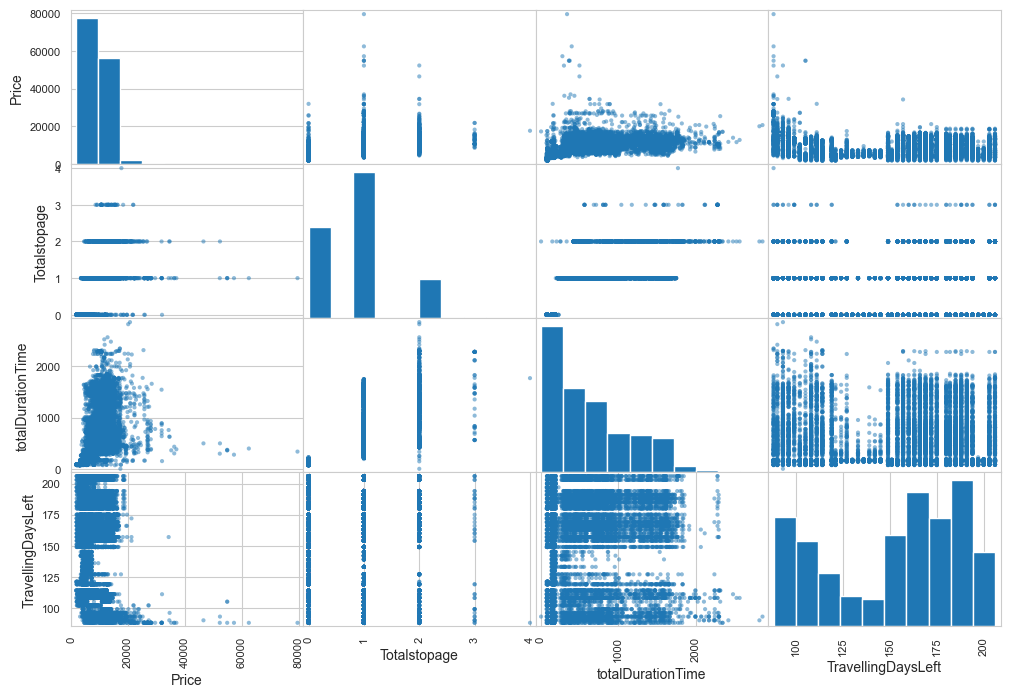

In [130]:
from pandas.plotting import scatter_matrix
attributes = ["Price", "Totalstopage", "totalDurationTime", "TravellingDaysLeft"]
scatter_matrix(airFare[attributes], figsize = (12,8))

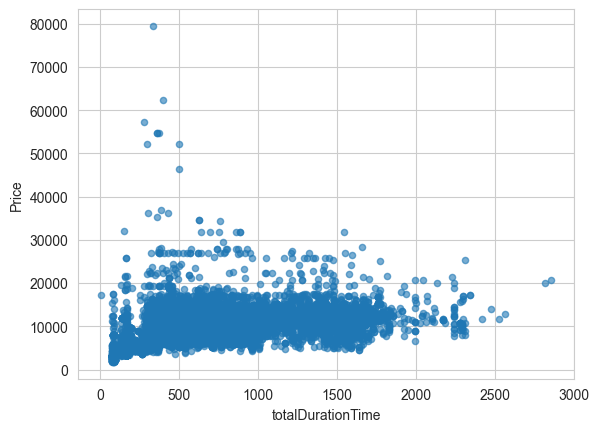

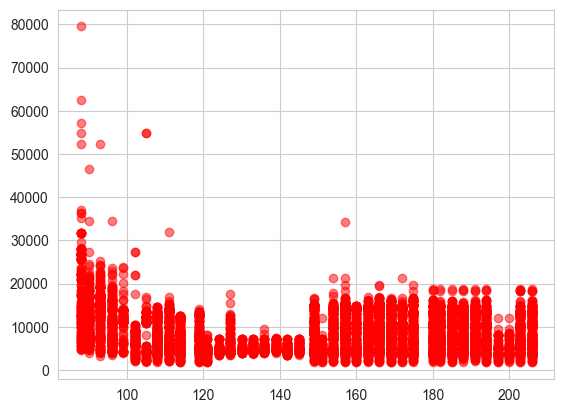

In [131]:
import matplotlib.pyplot as plt
%matplotlib inline
airFare.plot(kind="scatter", x="totalDurationTime", y="Price", alpha=0.6)
plt.show()
plt.scatter(airFare['TravellingDaysLeft'],airFare['Price'],c='r',alpha=0.5)
plt.show()

## Analysing the combinations

In [132]:
airFare.head()

,Price,TravellingDaysLeft,totalDurationTime,Totalstopage
0,3897,111,170.0,0.0
1,7662,149,445.0,2.0
2,13882,188,1140.0,2.0
3,6218,160,325.0,1.0
4,13302,88,285.0,1.0


In [133]:
corr_matrix = airFare.corr()
corr_matrix['Price'].sort_values(ascending=False)

Price                 1.000000
Totalstopage          0.603897
totalDurationTime     0.506371
TravellingDaysLeft   -0.138452
Name: Price, dtype: float64

In [134]:
airFare = strat_train_set.drop("Price", axis=1)
airfare_labels = strat_train_set["Price"].copy()
print(airfare_labels)

8998    13067
7270    10262
1025    10231
836      9646
3708     3100
        ...  
445      4823
1812     7575
8420     6945
746     14871
4719    10844
Name: Price, Length: 8546, dtype: int64


##  Finding Missing Attributes

In [135]:
## Get rid of missing value--Set the value to some value(0, mean or median)

In [136]:
a = airFare.dropna(subset=["Totalstopage"]) #Option 1
a.shape
# Note that the original housing dataframe will remain unchanged

(8545, 3)

In [137]:
airFare.drop("Totalstopage", axis=1).shape # Option 2
# Note that there is no RM column and also note that the original housing dataframe will remain unchanged

(8546, 2)

In [138]:
median = airFare["Totalstopage"].median() # Compute median for Option 3

In [139]:
airFare["Totalstopage"].fillna(median) # Option 3
# Note that the original housing dataframe will remain unchanged

8998    1.0
7270    1.0
1025    2.0
836     1.0
3708    0.0
       ... 
445     0.0
1812    1.0
8420    1.0
746     1.0
4719    1.0
Name: Totalstopage, Length: 8546, dtype: float64

In [140]:
airFare.shape

(8546, 3)

In [141]:
airFare.describe() # before we started filling missing attributes

,TravellingDaysLeft,totalDurationTime,Totalstopage
count,8546.000000,8546.000000,8545.000000
mean,152.824245,645.341680,0.828672
std,36.327939,506.937258,0.675201
min,88.000000,5.000000,0.000000
25%,114.000000,175.000000,0.000000
50%,163.000000,520.000000,1.000000
75%,185.000000,943.750000,1.000000
max,206.000000,2860.000000,4.000000


In [142]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(airFare)

SimpleImputer(strategy='median')

In [143]:
imputer.statistics_

array([163., 520.,   1.])

In [144]:
X = imputer.transform(airFare)
print(X)

[[1.570e+02 1.480e+03 1.000e+00]
 [1.800e+02 9.250e+02 1.000e+00]
 [1.690e+02 1.275e+03 2.000e+00]
 ...
 [1.630e+02 4.950e+02 1.000e+00]
 [9.300e+01 4.800e+02 1.000e+00]
 [1.660e+02 1.285e+03 1.000e+00]]


In [145]:
airFare_tr = pd.DataFrame(X, columns=airFare.columns)      #comverting the numpy array type x to the dataFrame

In [146]:
airFare_tr.describe()

,TravellingDaysLeft,totalDurationTime,Totalstopage
count,8546.000000,8546.000000,8546.000000
mean,152.824245,645.341680,0.828692
std,36.327939,506.937258,0.675164
min,88.000000,5.000000,0.000000
25%,114.000000,175.000000,0.000000
50%,163.000000,520.000000,1.000000
75%,185.000000,943.750000,1.000000
max,206.000000,2860.000000,4.000000


## Using Scikit learning
## three steps: Estimators-Transform-Predictors
LinearRegression model is an example of predictor. fit() and predict() are two common functions. It also gives score() function which will evaluate the predictions.

## Feature Scaling

Primarily, two types of feature scaling methods:
1. Min-max scaling (Normalization)
    (value - min)/(max - min)
    Sklearn provides a class called MinMaxScaler for this
    
2. Standardization
    (value - mean)/std
    Sklearn provides a class called StandardScaler for this
    
    
    
    
    
    these are done for every columns of the dataframe or array


## Creating a Pipeline

In [147]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    #     ..... add as many as you want in your pipeline
    ('std_scaler', StandardScaler()),
])


In [148]:
housing_num_tr = my_pipeline.fit_transform(airFare)

In [149]:
housing_num_tr.shape
print(housing_num_tr)

[[ 0.11495282  1.64656897  0.25374324]
 [ 0.74811139  0.55169487  0.25374324]
 [ 0.44529642  1.24215601  1.73495209]
 ...
 [ 0.28012462 -0.29658597  0.25374324]
 [-1.64687972 -0.32617716  0.25374324]
 [ 0.36271052  1.26188347  0.25374324]]


## Analysing different models for predicting rates

In [150]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model = LinearRegression()
#model = DecisionTreeRegressor()
#model = RandomForestRegressor()
model.fit(housing_num_tr, airfare_labels)
# print(model.coef_)
# print(model.intercept_)

LinearRegression()

In [151]:
some_data = airFare.iloc[:5]
some_data

,TravellingDaysLeft,totalDurationTime,Totalstopage
8998,157,1480.0,1.0
7270,180,925.0,1.0
1025,169,1275.0,2.0
836,185,385.0,1.0
3708,149,75.0,0.0


In [152]:
some_labels = airfare_labels.iloc[:5]
some_labels

8998    13067
7270    10262
1025    10231
836      9646
3708     3100
Name: Price, dtype: int64

In [153]:
prepared_data = my_pipeline.transform(some_data)
prepared_data

array([[ 0.11495282,  1.64656897,  0.25374324],
       [ 0.74811139,  0.55169487,  0.25374324],
       [ 0.44529642,  1.24215601,  1.73495209],
       [ 0.88575456, -0.51358804,  0.25374324],
       [-0.10527625, -1.12513934, -1.2274656 ]])

In [154]:
model.predict(prepared_data)

array([10598.0737515 ,  9454.63862758, 13623.0423883 ,  8718.2379302 ,
        5613.61570091])

In [155]:
list(some_labels)

[13067, 10262, 10231, 9646, 3100]

## Evaluating the model

In [156]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(airfare_labels, housing_predictions)
rmse = np.sqrt(mse)
print(mse)

13019964.139898356


In [157]:
rmse

3608.3187414498675

## Using better evaluation technique - Cross Validation

In [158]:
# 1 2 3 4 5 6 7 8 9 10
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, airfare_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [159]:
rmse_scores

array([3524.98486689, 3320.1441467 , 4514.25764338, 3651.29870702,
       3508.47542979, 3195.08001734, 3328.6235365 , 3644.06777002,
       3599.19767224, 3655.09583463])

In [160]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [161]:
print_scores(rmse_scores)

Scores: [3524.98486689 3320.1441467  4514.25764338 3651.29870702 3508.47542979
 3195.08001734 3328.6235365  3644.06777002 3599.19767224 3655.09583463]
Mean:  3594.122562451362
Standard deviation:  342.49963638825614


## Saving the model

In [162]:
arg=(model,my_pipeline)
from joblib import dump, load
dump(arg, 'Property.joblib')

['Property.joblib']

## Testing the model on test data

In [163]:
X_test = strat_test_set.drop("Price", axis=1)
Y_test = strat_test_set["Price"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions, list(Y_test))

[ 9682.03453125  7038.57277812 10284.93166784 ...  9344.67717284
  6570.80162105  4472.99425779] [7564, 15676, 9663, 7670, 18286, 8040, 4668, 2017, 6565, 10493, 3543, 9916, 10368, 15119, 13961, 5530, 13014, 5883, 9001, 16289, 2227, 7174, 5201, 11491, 7485, 12312, 11841, 12898, 5192, 5678, 9736, 4804, 14924, 12192, 3543, 11281, 11281, 10851, 18752, 8452, 13643, 4591, 3943, 13587, 4282, 3573, 5769, 6117, 5797, 4239, 3943, 13377, 5176, 6144, 4148, 3175, 13376, 3943, 10262, 7832, 6612, 5678, 7417, 3342, 4823, 18371, 10151, 7038, 31825, 12898, 3543, 12592, 10118, 7580, 13748, 6138, 4150, 4050, 5192, 4812, 10368, 9794, 10368, 2017, 7229, 9663, 10262, 15129, 9397, 6327, 5054, 12409, 4804, 11134, 14848, 4804, 14714, 2227, 6477, 3175, 19595, 14067, 16294, 10262, 3573, 6216, 15965, 8330, 11399, 3384, 12308, 7242, 15077, 11269, 3597, 9397, 21219, 3597, 22270, 3527, 10844, 8040, 11507, 6316, 14676, 2753, 5228, 14714, 6587, 4823, 10231, 7673, 6451, 11003, 7048, 3782, 10151, 7198, 8372, 5126, 8073, 

In [164]:
final_rmse

3420.089040542059

In [165]:
prepared_data

array([[ 0.11495282,  1.64656897,  0.25374324],
       [ 0.74811139,  0.55169487,  0.25374324],
       [ 0.44529642,  1.24215601,  1.73495209],
       [ 0.88575456, -0.51358804,  0.25374324],
       [-0.10527625, -1.12513934, -1.2274656 ]])

## Using the model